In [46]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

In [47]:
import os
os.getcwd()

'/Users/yuechenjiang/Desktop/CatMemo'

In [116]:
Start = '2022-10-06'
End = '2023-04-10'
Ticker = 'COIN'
df = yf.download(Ticker, start=Start, end=End)
df = df.reset_index()
Date = pd.to_datetime(df.iloc[:, 0]).tolist()
dates = [ts.strftime('%Y-%m-%d') for ts in Date]

[*********************100%%**********************]  1 of 1 completed


In [136]:
# df_Me = pd.read_csv('/Users/yuechenjiang/Desktop/CatMemo/result/COIN20221004-20230802.csv')
df_Me = pd.read_csv('/Users/yuechenjiang/Desktop/CatMemo/result/dat_df_coin_v2.csv')

In [137]:
df_GPT = pd.read_csv('/Users/yuechenjiang/Desktop/CatMemo/BenchMark/fingpt/coin_curie.csv')

In [138]:
def get_data(Start, End, ticker, df_GPT, df_Me):
    df = yf.download(ticker, start=Start, end=End)
    df_GPT['dates'] = pd.to_datetime(df_GPT['dates'])
    df_Me['date'] = pd.to_datetime(df_Me['date'])
    FinGPT = df_GPT[(df_GPT['dates'] >= Start) & (df_GPT['dates'] < End)]['actions'].tolist()
    FinMe = df_Me[(df_Me['date'] >= Start) & (df_Me['date'] < End)]['direction'].tolist()
    return df['Adj Close'].tolist(), FinGPT, FinMe

In [151]:
# df_park = pd.read_csv('/Users/yuechenjiang/Desktop/CatMemo/result/action_df_coin_v1.csv')
df_park = pd.read_csv('/Users/yuechenjiang/Desktop/CatMemo/result/action_df_coin_park_v2.csv')
df_park['date'] = pd.to_datetime(df_park['date'])
Park = df_park[(df_park['date'] >= Start) & (df_park['date'] < End)]['direction'].tolist()

/var/folders/kg/pwzs55h51hb6x5vbsqjvxhjc0000gn/T/ipykernel_46751/957266439.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_park['date'] = pd.to_datetime(df_park['date'])


In [152]:
B_H = [1] * 496

In [153]:
price, FinGPT, FinMe= get_data(Start, End, Ticker, df_GPT, df_Me)

[*********************100%%**********************]  1 of 1 completed


In [154]:
print(len(price),len(FinMe),len(Park))

137 137 137


In [143]:
def reward_list(price, actions):
    reward = 0
    reward_list = [0]
    for i in range(len(price)-1):
        reward += actions[i] * np.log(price[i+1]/price[i])
        reward_list.append(reward)
    return reward_list

In [144]:
B_H_rw = reward_list(price, B_H)
FinGPT_rw = reward_list(price, FinGPT)
FinMe_rw = reward_list(price, FinMe)
Park_rw = reward_list(price, Park)

In [145]:
Date = df_Me[(df_Me['date'] >= Start) & (df_Me['date'] < End)]['date'].tolist()
len(Date)

137

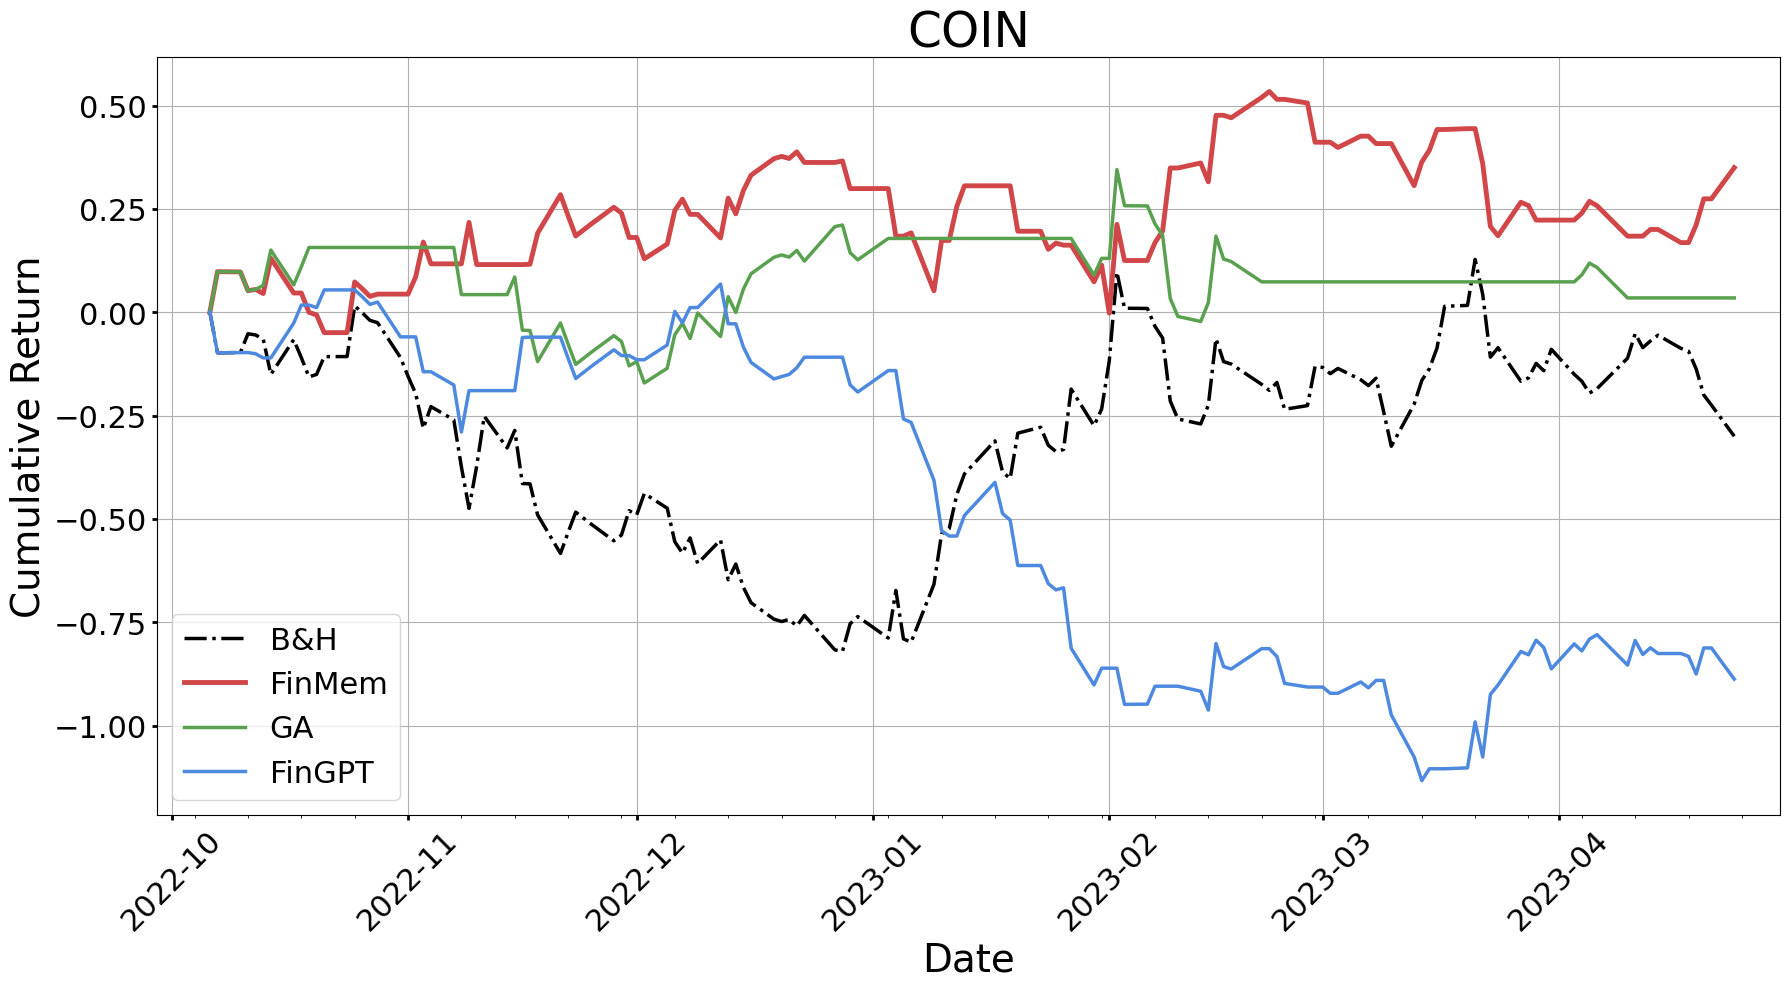

In [150]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

dates = pd.to_datetime(Date).tolist()

fig, ax = plt.subplots(figsize=(18, 10))

# Plotting the three lists
ax.plot(dates, B_H_rw, linewidth=2.5, label='B&H', linestyle='-.', color='#000')
ax.plot(dates, FinMe_rw, linewidth=3.5, label='FinMem', color='#d14749')
ax.plot(dates, Park_rw, linewidth=2.5, label='GA', color='#59a14f')
ax.plot(dates, FinGPT_rw, linewidth=2.5, label='FinGPT', color='#4e89e0')

ax.set_xlabel('Date', fontsize=28)
ax.set_ylabel('Cumulative Return', fontsize=28)
plt.title(Ticker, fontsize=35)

# Customize the legend
ax.legend(fontsize=22, frameon=True)

# Customize the grid
ax.grid(True)

# Customize the tick labels on both axes
ax.tick_params(axis='x', labelsize=22, width=2, rotation=45)
ax.tick_params(axis='y', labelsize=22, width=2)

# Set x-ticks to start from October 2022 and end in April 2023
start_date = datetime.datetime(2022, 9, 29)
end_date = datetime.datetime(2023, 4, 30)  # Corrected the year here
ax.set_xlim(left=start_date, right=end_date)
# ax.set_ylim(-0.85, 0.7)
# Format the dates on the x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.WeekdayLocator())

# Apply tight layout to ensure everything fits without overlapping
plt.tight_layout()

plt.savefig('/Users/yuechenjiang/Desktop/CatMemo/image/COIN2022-10-06-2023-04-10.png', format='png', dpi=300)
# Show the plot
plt.show()


# FinGPT VS Buy and Hold

In [159]:
count = 0
for i in range(len(FinGPT_rw)):
    if FinGPT_rw[i] > B_H_rw[i]:
        count += 1
count/len(FinGPT_rw)

0.43795620437956206

# FinMe VS Buy and Hold

In [160]:
count = 0
for i in range(len(FinMe_rw)):
    if FinMe_rw[i] > B_H_rw[i]:
        count += 1
count/len(FinMe_rw)

0.9927007299270073

# FinMe VS FinGPT

In [161]:
count = 0
for i in range(len(FinMe_rw)):
    if FinMe_rw[i] > FinGPT_rw[i]:
        count += 1
count/len(FinMe_rw)

0.9635036496350365

# 4. FinMe VS Generative Agents

In [162]:
count = 0
for i in range(len(Park_rw)):
    if FinMe_rw[i] > Park_rw[i]:
        count += 1
count/len(FinMe_rw)

0.7372262773722628